# Homework 1 (HW1)

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways; 
- Create meaningful visualizations to analyze the data;

---

## Important Dates

- Homework release: Fri 14 Oct 2022
- **Homework due**: Sat 29 Oct 2022, 23:59
- Grade release: Mon 07 Nov 2022

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

In this homework, we will analyze data from A/B tests of headlines conducted by Upworthy from January 2013 to April 2015 to study whether the language used in the headline determines the number of people that will read the associated news piece. The homework contains four tasks: in task 1, we will process the data; in task 2, we will extract meaningful signals from the data; in task 3, we will test whether the language of headlines impacts their success; and in task 4, we will explore the heterogeneity of this effects (e.g., does it vary through time?).


### **What is an A/B test?** 
A/B tests are experiments that compare two scenarios (e.g., scenario A vs. scenario B). 
They test subjects' responses to each of the variants to determine which is more effective ([read more about A/B tests on Wikipedia](https://en.wikipedia.org/wiki/A/B_testing)). 
A/B tests allow us to draw conclusions about the different scenarios by randomizing exposure to them, e.g., one could flip a coin and assign a user to scenario A if it lands heads and to B if it lands tails. 
Since exposure is randomized, we can be confident that the scenarios are the sole explanation for statistically significant differences in subjects' responses (if they exist). 
In theory, A/B testing refers to an experiment that compares two scenarios; however, in practice, the term is also used when we compare multiple scenarios (e.g., A vs. B vs. C), although the more precise terminology would be to call such an experiment a "multinomial test."

### **How were A/B tests used by Upworthy?** 
Upworthy used A/B testing to increase news readership, conducting experiments for each published news piece. 
In each experiment, they created multiple "packages" of stimuli, varying headlines, images, excerpts, and ledes for the same news piece. 
Different "packages" were shown on their (now defunct) website to engage users with the news pieces they produced. Upworthy found "the best" package by conducting A/B tests, showing different packages to different users, and measuring how often users clicked on each version. 
Below, we show three "packages" used by Upworthy in an experiment, each with a different headline for the same news piece. 
Upworthy randomized users that visited their website saw one of the three versions of the headline below. Then, they measured the percentage of times users in each scenario clicked to read the news. 
The headline with the highest percentage of clicks per view (click through rate) was then declared the "winner" and became the default for all visitors.

![Example A/B test](example.png)

 ### **Where does this data come from?** 
 
 From a paper [1].

[1] Matias, J.N., Munger, K., Le Quere, M.A. et al. The Upworthy Research Archive, a time series of 32,487 experiments in U.S. media. Sci Data 8, 195 (2021). https://doi.org/10.1038/s41597-021-00934-7

### **Where can I find this data?**  

You can find it in the `/data/` folder.

### **Terminology**

- **News piece:** A news article. In the dataset considered, these were all produced by Upworthy.
- **Package:** The set of visual stimuli inviting the user to read an article. The figure above shows a package with a headline and an image. At times, there was an excerpt of the article also shown in the package and/or the lede, i.e., ["the introductory section of a news story that is intended to entice the reader to read the full story."](https://www.merriam-webster.com/words-at-play/bury-the-lede-versus-lead#:~:text=In%20journalism%2C%20the%20lede%20refers,machines%20began%20disappearing%20from%20newsrooms.)
- **Experiment:** Each experiment is an A/B test (or multinomial test, to be more precise) comparing how users reacted to different "packages." Experiments measured two things: 1) how many users were shown each package; and 2) how many individuals clicked each package.

### **Data description**

| Column name          | Description                                                                                                                                                                                       |   |   |   |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| created_at           | Time the package was created (timezone unknown)                                                                                                                                                   |   |   |   |
| test_week            | Week the package was created, a variable constructed by the archive creators for stratified random sampling                                                                                       |   |   |   |
| clickability_test_id | The test ID. Viewers were randomly assigned to packages with the same test ID                                                                                                                     |   |   |   |
| impressions          | The number of viewers who were assigned to this package. The total number of participants for a given test is the sum of impressions for all packages that share the same clickability_test_id    |   |   |   |
| headline             | The headline being tested                                                                                                                                                                         |   |   |   |
| eyecatcher_id        | Image ID. Image files are not available. Packages that shared the same image have the same eyecatcher_id                                                                                          |   |   |   |
| clicks               | The number of viewers (impressions) that clicked on the package. The clickrate for a given package is the number of clicks divided by the number of impressions                                   |   |   |   |
| excerpt              | Article excerpt                                                                                                                                                                                   |   |   |   |
| lede                 | The opening sentence or paragraph of the story                                                                                                                                                    |   |   |   |
| slug                 | Internal name for the web address                                                                                                                                                                 |   |   |   |
| share_text           | Summary for display on social media when the article is shared. This was not shown in tests, since tests were conducted on the Upworthy website                                                   |   |   |   |
| square               | When used, part of the same social media sharing suggestion as the share text                                                                                                                     |   |   |   |
| significance         | NOT an estimate of statistical significance; a complex, inconsistent calculation that compared the clicks on a package to the clicks on all previous packages that were fielded on the same pages |   |   |   |
| first_place          | Along with significance, shown to editors to guide decisions about what test to choose                                                                                                            |   |   |   |
| winner               | Whether a package was selected by editors to be used on the Upworthy site after the test                                                                                                          |   |   |   |
| updated_at           | The last time the package was updated in the Upworthy system                                                                                                                                      |   |   |   |


## Task 1: Getting familiar with the data

Your first task is to conduct initial analyses to understand the data and process it in a way that will allow us to more easily answer our key question: *how does the language of a headline determine its success?*

1.1 Load the data into memory using pandas and print the first lines to get a sense of it.

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

In [151]:
data = pd.read_csv("Data/upworthy.csv", sep=',')
data.head(1)

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446


1.2 Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column). 
Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment. 
Last, plot the distribution of packages per experiment with a visualization of your choice.

4.2727084197428455


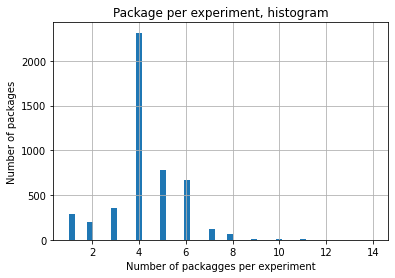

In [152]:
pac_size = data.groupby('clickability_test_id')['clickability_test_id'].count()
print(pac_size.mean())
#we use pandas wrapper
pac_size.hist(bins = 50)

#alternatively, we can use matplotlib directly
#plt.hist(movies['worldwide_gross'].values, bins = 100)

plt.xlabel('Number of packagges per experiment')
plt.ylabel('Number of packages')
plt.title('Package per experiment, histogram');

1.3 A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often. 
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

In [153]:
ctr = data['clicks'] / data['impressions']
data['ctr'] = ctr
data.head(5)

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,ctr
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446,0.049148
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.025525
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.034227
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.028994
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.021645


1.4 Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image). 
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present. 
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [154]:
new_data= data.groupby('clickability_test_id')
num_experiment = len(new_data)
headline_data_index= data.groupby('clickability_test_id')['headline'].nunique()
headline_data_index= headline_data_index[headline_data_index> 1]
num_filtered_ex = headline_data_index.shape[0]
print(num_filtered_ex)
print(num_experiment - num_filtered_ex)
headline_data = data[data['clickability_test_id'].isin(headline_data_index.index)]
headline_data.head()

2586
2236


,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,ctr
10,2014-11-20 14:57:52.478,2016-04-02 16:25:54.161,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,546c7f2dbadeb5788700000a,4594,51,20.7,False,False,NaN,NaN,201446,0.011101
20,2014-11-20 14:54:18.78,2016-04-02 16:25:54.159,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,A Science Guy Helps 3 Dudes From America Under...,<p>Some decent guys fighting for an important ...,a-science-guy-helps-3-dudes-from-america-under...,546c7f2dbadeb5788700000a,4571,58,57.6,False,False,NaN,NaN,201446,0.012689
21,2014-11-20 15:04:49.517,2016-04-02 16:25:54.112,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,He Sat Them Down And Told Them About An Immine...,<p>Some decent guys fighting for an important ...,he-sat-them-down-and-told-them-about-an-immine...,546c7f2dbadeb5788700000a,4601,27,0.0,False,False,NaN,NaN,201446,0.005868
22,2014-11-20 15:13:36.266,2016-04-02 16:31:47.52,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,"The 3 Of Them Needed To See It In Person, And ...",<p>Some decent guys fighting for an important ...,the-3-of-them-needed-to-see-it-in-person-and-t...,546c7f2dbadeb5788700000a,4567,63,100.0,True,False,NaN,NaN,201446,0.013795
23,2014-11-20 15:15:25.697,2016-04-02 16:25:54.117,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,"They May Not Be The Most Handsome Dudes, But T...",<p>Some decent guys fighting for an important ...,they-may-not-be-the-most-handsome-dudes-but-th...,546c7f2dbadeb5788700000a,4524,44,4.5,False,False,NaN,NaN,201446,0.009726


1.5 For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image. 
Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [155]:
new_data= data.groupby('clickability_test_id')
num_experiment = len(new_data)
eyecatcher_id_index= data.groupby('clickability_test_id')['eyecatcher_id'].nunique()
eyecatcher_id_index= eyecatcher_id_index[eyecatcher_id_index> 1]
num_filtered_ex = eyecatcher_id_index.shape[0]
print(num_filtered_ex)
print(num_experiment - num_filtered_ex)
eyecatcher_id_data = data[data['clickability_test_id'].isin(eyecatcher_id_index.index)]
eyecatcher_id_data.head()

1714
3108


,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,ctr
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.025525
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.034227
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.028994
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.021645
5,2014-11-20 06:55:43.497,2016-04-02 16:25:54.034,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900484ad38b2ce000027,3431,86,3.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.025066


1.6 **Discuss:** Considering the answers to questions **T1.4** and **T1.5**, what can we say about the different versions of the news tested by Upworthy?

1.7 For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece. 
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`. 
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`). 
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first rows of your newly created dataframe, as well as its length.
-  the rows where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.

In [156]:
from itertools import combinations
new= data[data.groupby(['clickability_test_id', 'eyecatcher_id','lede', 'excerpt'], dropna= False)['headline'].transform('nunique') != 1]
print(new.shape[0])
new.head(1)

10125


,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,ctr
10,2014-11-20 14:57:52.478,2016-04-02 16:25:54.161,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,546c7f2dbadeb5788700000a,4594,51,20.7,False,False,NaN,NaN,201446,0.011101


In [157]:
# f = lambda x,y : pd.DataFrame(list(combinations(x.values,2), combinations(y.values,2)), 
#                             columns=['headline1','headline2', 'ctr1', 'ctr2' ])
from itertools import permutations
from symbol import parameters

pair_data = new.groupby(['clickability_test_id', 'eyecatcher_id','lede', 'excerpt'], dropna= False).apply(lambda x :pd.DataFrame( list(m+n+k for m, n, k in zip(list(permutations(x.headline.values,2)),list((permutations(x.ctr.values,2))), list((permutations(x.created_at.values,2))))), 
                            columns=['headline1','headline2', 'ctr1', 'ctr2', 'created_at', 'created_at2']))
pair_data =pair_data[pair_data['ctr1']> pair_data['ctr2']]
pair_data.drop('created_at2', axis=1, inplace=True)
pair_data = pair_data
print(pair_data.shape[0])

17727


In [158]:
pair_data.head()

headline1  \
clickability_test_id     eyecatcher_id            lede                                               excerpt                                                                                                   
51436069220cb800020005bd 5332ba141fae79f09f002c47 <p>The President made a lot of promises, and he... You have so much potential. Why are you wasting... 0  Mr. President, I'm Not Mad. I'm Just Disappoin...   
5143606a220cb800020005c6 5332ba211fae79f09f002dcf <p>If you think Fawzia Koofi is crazy for wanti... You don't want to miss this incredible story.      0  MAD RESPECT: This Brave Woman Is Running For P...   
                                                                                                                                                        4  If You Think Hillary Had A Rough Campaign, You...   
                                                                                                                                                        5  If You Think Hillary Had A Rough Campaign, You...   
5143606b220cb800020005d7 5332ba581fae79f09f003326 <p><p>Sean Hannity thinks all women should have... Science can be confusing if you don't believe i... 2  Sean Hannity Thinks Telling Men Not To Attack ...   

                                                                                                                                                                                                   headline2  \
clickability_test_id     eyecatcher_id            lede                                               excerpt                                                                                                   
51436069220cb800020005bd 5332ba141fae79f09f002c47 <p>The President made a lot of promises, and he... You have so much potential. Why are you wasting... 0  Mr. President, I'm Not Mad. I'm Just Disappoin...   
5143606a220cb800020005c6 5332ba211fae79f09f002dcf <p>If you think Fawzia Koofi is crazy for wanti... You don't want to miss this incredible story.      0  This Brave Woman Is Running For President Of A...   
                                                                                                                                                        4  MAD RESPECT: This Brave Woman Is Running For P...   
                                                                                                                                                        5  This Brave Woman Is Running For President Of A...   
5143606b220cb800020005d7 5332ba581fae79f09f003326 <p><p>Sean Hannity thinks all women should have... Science can be confusing if you don't believe i... 2  Sean Hannity Thinks Its Waaaaay Too Hard To Te...   

                                                                                                                                                               ctr1  \
clickability_test_id     eyecatcher_id            lede                                               excerpt                                                          
51436069220cb800020005bd 5332ba141fae79f09f002c47 <p>The President made a lot of promises, and he... You have so much potential. Why are you wasting... 0  0.019770   
5143606a220cb800020005c6 5332ba211fae79f09f002dcf <p>If you think Fawzia Koofi is crazy for wanti... You don't want to miss this incredible story.      0  0.011216   
                                                                                                                                                        4  0.012807   
                                                                                                                                                        5  0.012807   
5143606b220cb800020005d7 5332ba581fae79f09f003326 <p><p>Sean Hannity thinks all women should have... Science can be confusing if you don't believe i... 2  0.013675   

                                                                                                               

1.8 To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (`ctr1`) and the least clicked-through headline (`ctr2`), as well as the average clickthrough rate for the least clicked through headline (`ctr2`). 

In [159]:
pair_data['diff_ctr'] = pair_data['ctr1']-pair_data['ctr2']
print(pair_data['diff_ctr'].mean())
print(pair_data['ctr2'].mean())

0.004116426877032467
0.010691857228802372


1.9 **Discuss:** Considering your answer to **T1.8**, and assuming the average differences in clickthrough rates between pairs are statistically significant, do you think that headlines are impactful in the news business? Justify with the data.

## Task 2: Extracting signals from the data

Your second task is to extract meaningful signals from the data. 
We start this task from the dataset obtained in **T1.7**. 
Recall that we have one A/B test per row with the clickthrough rate of two news pieces that differ only in their headline. 
We refer to the version with the higher clickthrough rate as the "winner" and the version with the lower as the "loser." 
(Note that this is not the same as the column `winner` in the original data, which captures a similar concept but considering the original experiments, where multiple comparisons were made!)
    
[1]: https://ptrckprry.com/course/ssd/data/positive-words.txt
[2]: https://ptrckprry.com/course/ssd/data/negative-words.txt

--- 

**Comments**

- For **T2.3**, beware of encodings!

2.1 Using the function provided below, count the number of words in each headline, creating columns `numwords1` and `numwords2` corresponding to the number of words in the winner and loser headlines.

In [160]:
# 2.1 (provided code)
def count_words_simple(x):
    return len(x.split(" "))
str_test = "How many words are here?"
print(str_test, count_words_simple(str_test))


How many words are here? 5


In [161]:
pair_data['numwords1']= pair_data['headline1'].apply(count_words_simple)
pair_data['numwords2']= pair_data['headline2'].apply(count_words_simple)
pair_data.head(1)

,,,,,headline1,headline2,ctr1,ctr2,created_at,diff_ctr,numwords1,numwords2
clickability_test_id,eyecatcher_id,lede,excerpt,,,,,,,,,
51436069220cb800020005bd,5332ba141fae79f09f002c47,"<p>The President made a lot of promises, and he took a lot of action on many of them. Not all of them, though. Somewhere along the way he seems to have gotten distracted. We should probably get to the bottom of that.<br></p>",You have so much potential. Why are you wasting it?,0,"Mr. President, I'm Not Mad. I'm Just Disappoin...","Mr. President, I'm Not Mad. I'm Just Disappoin...",0.01977,0.016595,2013-02-07 05:42:25,0.003174,9,15


2.2 Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns `first_person_singular1` and `first_person_singular2` for the headlines in each A/B test). 
Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise. 
Your code should be agnostic to lower/upper case.

In [162]:
# 2.2 (provided code)
feature_wordsets = dict([
    # https://en.wikipedia.org/wiki/English_personal_pronouns
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                               "i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                              "we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                              "ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve', 
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                               "he'd", "he's", 'hes',
                               'she','her','hers','herself', 
                               "she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                              "they'd", "they'll", "they've", 'theyll', 'theyve'])
])

In [163]:
for pronoun in feature_wordsets:
    feature1 = pronoun+'1'
    feature2 = pronoun+'2'
    pair_data[feature1] = pair_data['headline1'].apply(lambda x: int(bool(len(set(x.lower().split(" ")) & set(feature_wordsets[pronoun])))))
    pair_data[feature2] = pair_data['headline2'].apply(lambda x: int(bool(len(set(x.lower().split(" ")) & set(feature_wordsets[pronoun])))))
pair_data.head(1)

,,,,,headline1,headline2,ctr1,ctr2,created_at,diff_ctr,numwords1,numwords2,first_person_singular1,first_person_singular2,first_person_plural1,first_person_plural2,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2
clickability_test_id,eyecatcher_id,lede,excerpt,,,,,,,,,,,,,,,,,,,
51436069220cb800020005bd,5332ba141fae79f09f002c47,"<p>The President made a lot of promises, and he took a lot of action on many of them. Not all of them, though. Somewhere along the way he seems to have gotten distracted. We should probably get to the bottom of that.<br></p>",You have so much potential. Why are you wasting it?,0,"Mr. President, I'm Not Mad. I'm Just Disappoin...","Mr. President, I'm Not Mad. I'm Just Disappoin...",0.01977,0.016595,2013-02-07 05:42:25,0.003174,9,15,1,1,0,0,0,0,0,0,0,0



2.3 One easy way to classify sentiment is simply to match negative or positive words. 
Use the linked lists of words ([positive][1], [negative][2]) to obtain "positive sentiment" and "negative sentiment" scores for each headline. Create columns `positive1`/`positive2` and `negative1`/`negative2` containing indicator variables for positive and negative sentiment, i.e., A headline has a "positive sentiment" (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its "positive sentiment" (or negative) score equals 0.

In [116]:
pd.read_csv('data/{}-words.txt'.format("negative"),names=['words'], skiprows= [i for i in range(0,35)], encoding="ISO-8859-1")

,words
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable
...,...
4778,zaps
4779,zealot
4780,zealous
4781,zealously


In [164]:
for string in ['positive', 'negative']:
    lst = list(pd.read_csv('data/{}-words.txt'.format(string),names=['words'], skiprows= [i for i in range(0,35)], encoding="ISO-8859-1")['words'])
    for integer in ['1','2']:
        pair_data[string+integer] = pair_data['headline'+ integer].apply(lambda x: int(bool(len(set(x.lower().split(" ")) & set(lst)))))
pair_data.head(1)

,,,,,headline1,headline2,ctr1,ctr2,created_at,diff_ctr,numwords1,numwords2,first_person_singular1,first_person_singular2,...,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2,positive1,positive2,negative1,negative2
clickability_test_id,eyecatcher_id,lede,excerpt,,,,,,,,,,,,,,,,,,,,,,
51436069220cb800020005bd,5332ba141fae79f09f002c47,"<p>The President made a lot of promises, and he took a lot of action on many of them. Not all of them, though. Somewhere along the way he seems to have gotten distracted. We should probably get to the bottom of that.<br></p>",You have so much potential. Why are you wasting it?,0,"Mr. President, I'm Not Mad. I'm Just Disappoin...","Mr. President, I'm Not Mad. I'm Just Disappoin...",0.01977,0.016595,2013-02-07 05:42:25,0.003174,9,15,1,1,...,0,0,0,0,0,0,0,0,0,1


## Task 3: Estimating the effect of language on headline success

Your third task revolves around the question *how does language impact headlines' success?*

    
---
**Comments:**

- Paired t-test formula: $t = \frac{\overline{x}_{\mathrm{diff}}}{s_{\mathrm{diff}} / \sqrt n }$ where:
    - $\overline{x}_{\mathrm{diff}}$ is the sample difference between the means of the matched sample; and
    - $s_{\mathrm{diff}}$ is the sample variance of the matched sample; and
    - $n$ is the number of matched samples.
    
- Independent samples t-test formula: $t = \frac{\overline{x}_{1} - \overline{x}_{2}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}}$ where:
    - $\overline{x}_{\mathrm{1}}$ is the sample mean of the first group; and
    - $s_{\mathrm{1}}$ is the sample variance of the first group; and
    - $n_1$ is the number of samples in the first group;
    
     
- t-tests are valid for samples of non-normal distribution for large enough samples (a rule of thumb used is: n$\geq$30)!

3.1 First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind); for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

In [165]:
from scipy import stats
numwords1 = pair_data['numwords1']
numwords2 = pair_data['numwords2']
#Independent sample t-test
print(stats.ttest_ind(numwords1, numwords2))

#Paired t-test
print(stats.ttest_rel(numwords1, numwords2))

print(np.mean(numwords1)- np.mean(numwords2))

Ttest_indResult(statistic=8.474890728758453, pvalue=2.442511064669354e-17)
Ttest_relResult(statistic=10.208663781647644, pvalue=2.118549790803972e-24)
0.277655553675185


3.2 **Discuss:** Are longer headlines more successful? Justify.

Since the p-value of our result is way smaller than 0.05, we can reject the null hypothesis, thus that is statistically significant longer headlines are more successful.

3.3 The [t-statistic](https://en.wikipedia.org/wiki/T-statistic) is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use `numpy.random` to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$

In [166]:
X = np.random.uniform(0,1,30)
Y = np.random.uniform(0,1,30)
Z = X/2 + Y/2 + 0.1
K = Y + 0.1

3.4 **Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)

expected value of X: 0.5  
expected value of Y: 0.5  
expected value of Z: 1.1  
expected value of K: 0.6  
variance of X: 0.08333333333333333    
variance of Y: 0.08333333333333333   
variance of Z: 0.041666666666666664  
variance ofo K: 0.08333333333333333    

3.5 Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each). 
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

In [167]:
p_XZs = []
p_XKs = []
for i in range(10000):
    X = np.random.uniform(0,1,30)
    Y = np.random.uniform(0,1,30)
    Z = X/2 + Y/2 + 0.1
    K = Y + 0.1
    s_XZ, p_XZ = stats.ttest_ind(X, Z)
    p_XZs.append(p_XZ)
    s_XK, p_XK = stats.ttest_ind(X, K)
    p_XKs.append(p_XK)
p_XZs = np.array(p_XZs)
p_XKs = np.array(p_XKs)

In [168]:
np.mean(p_XZs), np.mean(p_XKs)

(0.18144224585324223, 0.28468623680547334)

3.6 Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.


In [169]:
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

#calculation of effect size
# size of samples in pilot study
n1, n2 = 30, 30
  
# variance of samples in pilot study
s1, s2 = 5**2, 5**2
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = math.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
  
# means of the samples
u1, u2 = 90, 85
  
# calculate the effect size
d = (u1 - u2) / s
print(f'Effect size: {d}')
  
# factors for power analysis
alpha = 0.05
power = 0.8
  
# perform power analysis to find sample size 
# for given effect
obj = smp.TTestPower()
n_test = obj.power(nobs=30, effect_size = d, alpha = alpha)

Effect size: 1.0


3.7 **Discuss:** When are paired t-tests helpful? Justify.

3.8 With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average and 95% confidence intervals for:
- the ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
- the difference in usage of positive words between winner and loser headlines.
- the difference in usage of negative words between winner and loser headlines.
- The difference in usage of each type of pronoun between winner and loser headlines.

In [170]:
def draw_bs_replicates(data,func,size):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data,size=len(data), replace= True)
        bs_replicates[i] = func(bs_sample)  
    return bs_replicates

In [171]:
# - the ratio between the number of words in the winner headline and the loser headline 
num_word_ratio = draw_bs_replicates(numwords1/ numwords2,np.mean,1000)
print("the ratio between the number of words in the winner headline and the loser headline ")
print("Empirical mean: " + str(np.mean(numwords1/numwords2)))
print("Bootstrap replicates mean: " + str(np.mean(num_word_ratio)))
conf_interval = np.percentile(num_word_ratio,[2.5,97.5])
print(conf_interval)

# - the difference in usage of positive words between winner and loser headlines.
num_pos_ratio = draw_bs_replicates(pair_data.positive1- pair_data.positive2, np.mean,1000)
print("the difference in usage of positive words between winner and loser headlines.")
print("Empirical mean: " + str(np.mean(pair_data.positive1- pair_data.positive2)))
print("Bootstrap replicates mean: " + str(np.mean(num_pos_ratio)))
conf_interval = np.percentile(num_pos_ratio,[2.5,97.5])
print(conf_interval)
# - the difference in usage of negative words between winner and loser headlines.
num_neg_ratio = draw_bs_replicates(pair_data.negative1- pair_data.negative2, np.mean,1000)
print("the difference in usage of negative words between winner and loser headlines.")
print("Empirical mean: " + str(np.mean(pair_data.negative1- pair_data.negative2)))
print("Bootstrap replicates mean: " + str(np.mean(num_neg_ratio)))
conf_interval = np.percentile(num_neg_ratio,[2.5,97.5])
print(conf_interval)

# - The difference in usage of each type of pronoun between winner and loser headlines.
for pronoun in feature_wordsets:
    num_pro_ratio = draw_bs_replicates(pair_data[pronoun + str(1)]- pair_data[pronoun + str(2)], np.mean,1000)
    print("the difference in usage of pronoun " + pronoun)
    print("Empirical mean: " + str(np.mean(pair_data[pronoun + str(1)]- pair_data[pronoun + str(2)])))
    print("Bootstrap replicates mean: " + str(np.mean(num_pro_ratio)))
    conf_interval = np.percentile(num_pro_ratio,[2.5,97.5])
    print(conf_interval)


the ratio between the number of words in the winner headline and the loser headline 
Empirical mean: 1.0620943700559045
Bootstrap replicates mean: 1.062230887398618
[1.05778376 1.06680841]
the difference in usage of positive words between winner and loser headlines.
Empirical mean: -0.007333446155581881
Bootstrap replicates mean: -0.00718124894229142
[-0.01664269  0.00214644]
the difference in usage of negative words between winner and loser headlines.
Empirical mean: 0.01641563716364867
Bootstrap replicates mean: 0.01644553505951374
[0.00778474 0.02470807]
the difference in usage of pronoun first_person_singular
Empirical mean: 0.015174592429627123
Bootstrap replicates mean: 0.01524121396739437
[0.00969989 0.02115558]
the difference in usage of pronoun first_person_plural
Empirical mean: -0.011056580357646529
Bootstrap replicates mean: -0.011112596604050317
[-0.01652987 -0.00569752]
the difference in usage of pronoun second_person
Empirical mean: 0.004400067693349129
Bootstrap replica

3.9 **Discuss:** According to the results obtained in **T3.8**, what headlines grab people's attention the most? Justify your answer.

## Task 4: Temporal validity and heterogeneity of the effect.

Last, we investigate how the effects studied in **T3** change with time and how they might be heterogeneous across different types of news.


4.1 Create a plot where you depict the monthly average number of words in winner and loser headlines. Consider only headlines created after April 2013 (the month of April inclusive). Include also bootstrapped 95% confidence intervals; here, you can use a third-party implementation if you want. Finally, recall that we created a column `date_created` which captures the creation of the winner headline; you can consider this date to correspond to the date of the creation of the A/B test.

Text(0, 0.5, 'Avg Number of Words')

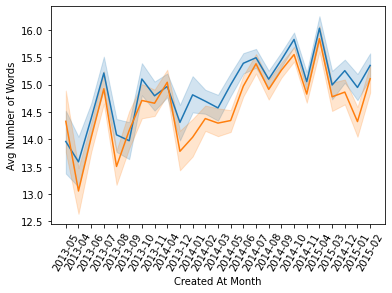

In [183]:
from datetime import datetime
import matplotlib.pylab as plt
pair_data['created_at']=pd.to_datetime(pair_data['created_at'])
pair_data_time = pair_data[pair_data['created_at'] >= datetime(2013, 4, 1, 0, 0, 0, 0)]
pair_data_time['month']=  pair_data_time['created_at'].dt.strftime('%Y-%m')
ax = sns.lineplot(x="month", y="numwords1", data= pair_data_time)
ax = sns.lineplot(x="month", y="numwords2", data= pair_data_time)
plt.xticks(rotation=60)
plt.xlabel("Created At Month")
plt.ylabel("Avg Number of Words")

4.2 Produce similar plots to each pronoun category, as well as for positive and negative sentiment. Here, unlike in **T4.1**, depict the month averages pooled across winner and loser headlines (i.e., for each month, you calculate the average across both winners and loser headlines).
Create all these plots in a single figure with no more than 11 inches of width and 11 inches of height. Again, consider only headlines created after April 2013 (the month of April inclusive).

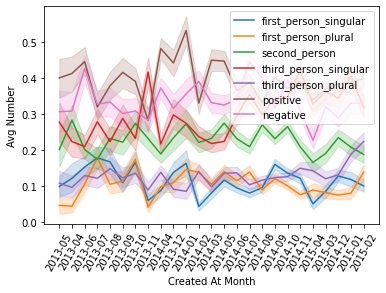

<Figure size 792x792 with 0 Axes>

In [195]:
for pronoun in feature_wordsets:
    pair_data_time['avg_' + pronoun] = (pair_data_time[pronoun+ str(1)] + pair_data_time[pronoun + str(2)])/2
    ax = sns.lineplot(x="month", y='avg_' + pronoun, data= pair_data_time, label= pronoun)
    plt.xticks(rotation=60)
    plt.xlabel("Created At Month")
    plt.ylabel("Avg Number")
for i in ['positive', 'negative']:
    pair_data_time['avg_' + i] = (pair_data_time[i+ str(1)] + pair_data_time[i + str(2)])/2
    ax = sns.lineplot(x="month", y='avg_' + i, data= pair_data_time, label= i)
    plt.xticks(rotation=60)
    plt.xlabel("Created At Month")
    plt.ylabel("Avg Number")
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(11)

4.3 **Discuss:** Has the type of headline Upworthy used in their A/B tests changed with time? Are these changes likely to be producing more or less engaging headlines? Justify.

4.4 Divide your data into two periods, $t_1$, which goes from  April 2013 (inclusive) to March 2014 (inclusive), and $t_2$, which goes from April 2014 (inclusive) to the latest A/B test in the data. Create a dataframe for A/B tests in each period.

In [174]:
pair_data_time = pair_data[pair_data['created_at'] >= datetime(2013, 4, 1, 0, 0, 0, 0)]
t1 =pair_data[pair_data['created_at'] < datetime(2014, 4, 1, 0, 0, 0, 0)]
t2 =pair_data[pair_data['created_at'] >= datetime(2014, 4, 1, 0, 0, 0, 0)]

4.5 Let's examine if the effects observed remained the same throughout the study period. Use an appropriate methodology  of your choice to determine if the effects observed in **T3.8** (length, each category of pronouns, positive words, and negative words) were different in $t_1$ and $t_2$. Here, note that we are considering "at least one positive outcome" to be the manifestation of an underlying effect, thus significance level must be adjusted down when performing multiple hypothesis tests!

In [198]:
# - the ratio between the number of words in the winner headline and the loser headline 
num_word_ratio = draw_bs_replicates(t1.numwords1/ t1.numwords1,np.mean,1000)
print("the ratio between the number of words in the winner headline and the loser headline ")
print("Empirical mean: " + str(np.mean(t1.numwords1/t1.numwords2)))
print("Bootstrap replicates mean: " + str(np.mean(num_word_ratio)))
conf_interval = np.percentile(num_word_ratio,[2.5,97.5])
print(conf_interval)

# - the difference in usage of positive words between winner and loser headlines.
num_pos_ratio = draw_bs_replicates(t1.positive1- t1.positive2, np.mean,1000)
print("the difference in usage of positive words between winner and loser headlines.")
print("Empirical mean: " + str(np.mean(t1.positive1- t1.positive2)))
print("Bootstrap replicates mean: " + str(np.mean(num_pos_ratio)))
conf_interval = np.percentile(num_pos_ratio,[2.5,97.5])
print(conf_interval)
# - the difference in usage of negative words between winner and loser headlines.
num_neg_ratio = draw_bs_replicates(t1.negative1- t1.negative2, np.mean,1000)
print("the difference in usage of negative words between winner and loser headlines.")
print("Empirical mean: " + str(np.mean(t1.negative1- t1.negative2)))
print("Bootstrap replicates mean: " + str(np.mean(num_neg_ratio)))
conf_interval = np.percentile(num_neg_ratio,[2.5,97.5])
print(conf_interval)

# - The difference in usage of each type of pronoun between winner and loser headlines.
for pronoun in feature_wordsets:
    num_pro_ratio = draw_bs_replicates(t1[pronoun + str(1)]- t1[pronoun + str(2)], np.mean,1000)
    print("the difference in usage of pronoun " + pronoun)
    print("Empirical mean: " + str(np.mean(t1[pronoun + str(1)]- t1[pronoun + str(2)])))
    print("Bootstrap replicates mean: " + str(np.mean(num_pro_ratio)))
    conf_interval = np.percentile(num_pro_ratio,[2.5,97.5])
    print(conf_interval)


the ratio between the number of words in the winner headline and the loser headline 
Empirical mean: 1.0688075967710642
Bootstrap replicates mean: 1.0
[1. 1.]
the difference in usage of positive words between winner and loser headlines.
Empirical mean: -0.0030413625304136255
Bootstrap replicates mean: -0.0033605028386050283
[-0.02027575  0.01439578]
the difference in usage of negative words between winner and loser headlines.
Empirical mean: 0.04034874290348743
Bootstrap replicates mean: 0.04001236820762368
[0.02452859 0.05535787]
the difference in usage of pronoun first_person_singular
Empirical mean: 0.012773722627737226
Bootstrap replicates mean: 0.012786293592862936
[0.00162206 0.02332218]
the difference in usage of pronoun first_person_plural
Empirical mean: -0.013990267639902677
Bootstrap replicates mean: -0.013687347931873478
[-0.02393045 -0.00304136]
the difference in usage of pronoun second_person
Empirical mean: 0.019059205190592052
Bootstrap replicates mean: 0.01926419302514

In [199]:
# - the ratio between the number of words in the winner headline and the loser headline 
num_word_ratio = draw_bs_replicates(t2.numwords1/ t2.numwords1,np.mean,1000)
print("the ratio between the number of words in the winner headline and the loser headline ")
print("Empirical mean: " + str(np.mean(t2.numwords1/t2.numwords2)))
print("Bootstrap replicates mean: " + str(np.mean(num_word_ratio)))
conf_interval = np.percentile(num_word_ratio,[2.5,97.5])
print(conf_interval)

# - the difference in usage of positive words between winner and loser headlines.
num_pos_ratio = draw_bs_replicates(t2.positive1- t2.positive2, np.mean,1000)
print("the difference in usage of positive words between winner and loser headlines.")
print("Empirical mean: " + str(np.mean(t2.positive1- t2.positive2)))
print("Bootstrap replicates mean: " + str(np.mean(num_pos_ratio)))
conf_interval = np.percentile(num_pos_ratio,[2.5,97.5])
print(conf_interval)
# - the difference in usage of negative words between winner and loser headlines.
num_neg_ratio = draw_bs_replicates(t2.negative1- t2.negative2, np.mean,1000)
print("the difference in usage of negative words between winner and loser headlines.")
print("Empirical mean: " + str(np.mean(t2.negative1- t2.negative2)))
print("Bootstrap replicates mean: " + str(np.mean(num_neg_ratio)))
conf_interval = np.percentile(num_neg_ratio,[2.5,97.5])
print(conf_interval)

# - The difference in usage of each type of pronoun between winner and loser headlines.
for pronoun in feature_wordsets:
    num_pro_ratio = draw_bs_replicates(t2[pronoun + str(1)]- t2[pronoun + str(2)], np.mean,1000)
    print("the difference in usage of pronoun " + pronoun)
    print("Empirical mean: " + str(np.mean(t2[pronoun + str(1)]- t2[pronoun + str(2)])))
    print("Bootstrap replicates mean: " + str(np.mean(num_pro_ratio)))
    conf_interval = np.percentile(num_pro_ratio,[2.5,97.5])
    print(conf_interval)

the ratio between the number of words in the winner headline and the loser headline 
Empirical mean: 1.0595066690665098
Bootstrap replicates mean: 1.0
[1. 1.]
the difference in usage of positive words between winner and loser headlines.
Empirical mean: -0.008987885892926924
Bootstrap replicates mean: -0.009067995310668231
[-0.01992966  0.00203791]
the difference in usage of negative words between winner and loser headlines.
Empirical mean: 0.007190308714341539
Bootstrap replicates mean: 0.0072318093005080105
[-0.00320633  0.01719812]
the difference in usage of pronoun first_person_singular
Empirical mean: 0.016100039077764753
Bootstrap replicates mean: 0.015899257522469713
[0.0092204  0.02313404]
the difference in usage of pronoun first_person_plural
Empirical mean: -0.009925752246971474
Bootstrap replicates mean: -0.009895506057053536
[-0.01641462 -0.00359515]
the difference in usage of pronoun second_person
Empirical mean: -0.0012504884720593982
Bootstrap replicates mean: -0.00113700

4.6 **Discuss:** Hypothesize two reasons that could have led to a change in the observed effects. According to the analysis done in **T4.5**, have the effects observed remained the same across the study period? 

4.7 The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (I am amazed!), but dislike headlines with negative words and first person pronouns (I am sad!). To help answer this question, create:
- a dataframe containing all A/B tests where both winner and loser headlines include a positive word; and
- a dataframe containing all A/B tests where both winner and loser headlines include a negative word;

In [209]:
d1= pair_data[(pair_data['positive1']== 1) & (pair_data['positive2'] == 1)]
d2= pair_data[(pair_data['negative1']== 1) & (pair_data['negative2'] == 1)]

4.8 Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in **T4.7**? 

In [213]:
#Independent sample t-test
print(stats.ttest_ind(d1['first_person_singular1'], d1['first_person_singular2']))

#Paired t-test
print(stats.ttest_rel(d1['first_person_singular1'], d1['first_person_singular2']))

print(np.mean(d1['first_person_singular1'])- np.mean(d1['first_person_singular2']))

Ttest_indResult(statistic=2.0461254303497034, pvalue=0.040781757425928176)
Ttest_relResult(statistic=2.369635459532912, pvalue=0.0178602138415081)
0.015606936416184963


In [214]:
#Independent sample t-test
print(stats.ttest_ind(d2['first_person_singular1'], d2['first_person_singular2']))

#Paired t-test
print(stats.ttest_rel(d2['first_person_singular1'], d2['first_person_singular2']))

print(np.mean(d2['first_person_singular1'])- np.mean(d2['first_person_singular2']))

Ttest_indResult(statistic=0.5579293453781935, pvalue=0.576912202086717)
Ttest_relResult(statistic=0.6913541776357267, pvalue=0.48939328530600135)
0.0043859649122807015


4.9 **Discuss:** Considering the analyses you did throughout Tasks 3 and 4, write a short text (no more than 250 words) giving advice to Upworthy employees on how they should try to write engaging headlines. 
You can reference images present in the notebook by indicating a task (e.g., image plotted in **T3.3**) or a cell number. Note that you do not need to conduct any additional analysis to write this text. 